<a href="https://colab.research.google.com/github/CharlyAguirre/ADA-informes/blob/main/mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de la mochila.

**Entrada:**: arreglo con los precios de los objetos (**valores[i]**), otro arreglo con el peso de los objetos (**pesos[i]**) y por ultimo un valor que corresponde al peso maximo con el que se puede llevar la mochila (**pesoMaximo**).

**def problemaMochila(valores, pesos, pesoMaximo):**

**Salida:**primero tenemos un valor correspondiente al maximo valor que nos podemos llevar con la mochila (**matriz[i, p]**)

**return matriz[i,p]**

El problema de la mochila conistes en lo siguiente, tienes una mochila con la cual tienes un peso maximo que puedes cargar y tienes varios objetos a tu alcance que te puedes llevar en la mochiles, cada objeto tiene un valor y un peso propio, con esta informacion tienes que maximizar el valor que te puedes llevar en objetos hechandolos a la mochila sin pasarte del peso maximo que esta posee. Al tener que maximizar el valor que te puedes llevar en la mochila este problema entra dentro de la catergoria de problema de optimizacion.

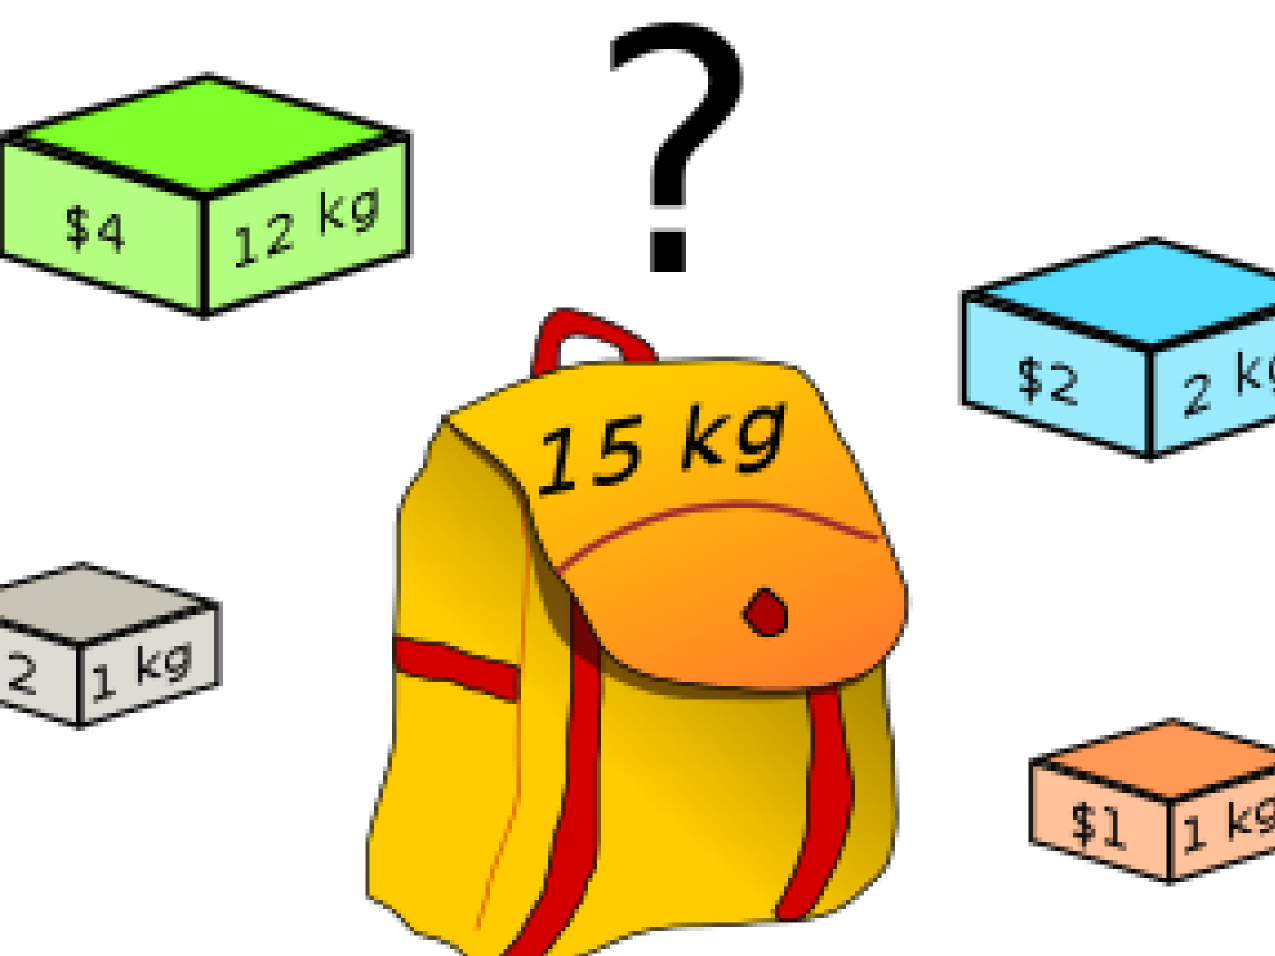

# 2. problemaMochila

El algoritmo para obtener la solución al problema de corte de varilla realizaremos dos implemetaciones.

1) Programacion dinamica (Iterativo bottom-up).

2) Metodo voraz.

**1)** Un algoritmo iterativo bottom-up es un método de programación dinámica. La programación dinámica consiste en la combinación de soluciones de sub-promeblas para encontrar la solución al problema mayor al que pertenecen estos sub-problemas, las soluciones de estos sub-problemas son guardadas por si más adelante el algoritmo se encuentra con un sub-problema igual a uno ya calculado no tenga que calcularlo otra vez y solo acceda a la solución, estas soluciones son guardadas en un arreglo, diccionario, tabla hash, etc. Por lo mencionado anteriormente es recomendable usar este método cuando al dividir el problema mayor en sub-problemas se observe que en el desarrollo del algoritmo este se encontrara con sub-problemas iguales, ya que si todos los sub-problemas son distintos sería un gasto de memoria innecesario el realizar esta implementación.

Que la programación dinámica sea bottom-up se refiere a que los sub-problemas se van resolviendo desde el más pequeño al más grande.

**2)** El metodo voraz consite particionar el problema en una serie de subproblemas de similares características, pero a diferencia de la programaciona dinamica este metodo ***se la juega*** solo por uno de los subproblemas, pero como elije por cual de los subproblemas se la debe jugar? pues, se la juega por el que parece la mejor opcion en ese momento sin pensar en los pasos a futuro por lo que este metodo no siempre optiene la solucion optima. 

## 2.1 Descripción problemaMochila bottom-up.

Para poder implementar este medoto primero debemos de considerar una subestructura optima para representar las soluciones a todos los subproblemas que pertenecen al problema de la mochila. Para resolver este problema haremos uso de una matriz de i+1 filas por p+1 columnas siendo i el largo del arreglo de pesos/valors, esta i representa las claves de cada objeto y p es el valor del peso maximo de la mochila, esto para tener la matriz de todos los posibles pesos desde 0 hasta el peso maximo. 

Ya con esta matriz podemos plantear la subestructura optima. tenemos la siguiente matriz:

m[i,p] --> i siendo la clave del objeto que estoy evaluando y p el peso que se considera ese momento.

En esta matriz podemos tener 3 posibles casos para encontrar la solucion:

1) 0 ; si i == 0 o p == 0, si i == 0 el objeto es nulo y si p == 0 el peso evaluado es 0 por lo que no es valido.

2) m[i-1,p] ; si pesos[i] > p, esto significa que el peso del objeto que evaluamos supera al peso maximo que tenemos en ese momento, como esto no es valido tomaremos la solucion del objeto anterior.

3) max(m[i-1,p] , m[i-1,p-p[i] + valores[i]] ; si pesos[i] <= p, esto significa que el peso del objeto que estamos evaluendo es valido por lo que tenemos que tomar el maximo entre el valor que se encuentra en la fila anterior en la misma columna o el valor que se encuentra en una fila y columna anterio en la que estamos mas el valor del elemento con clave i.

**Explicacion codigo:**

Ahora con esta subestructura podemos explicar como se la logica del algorimo que se implemta mas adelante. Primero encontramos la declaracion de la matriz que utilizaremos, despues tenemos un ciclo repetitivo **for** que se encuentra en **rango de 0 hasta len(valores) + 1**, este ciclo hace avanzar el inice i de la matriz que fue explicado en la subestructura optima, luego tenemos otro ciclo repetitivo **for** el cual se encuentra en **rango de 0 hasta pesoMaximo + 1**, este se encarga de hacer avanzar el inidice p de la matriz, ya por ultimo nos encontramos con 2 condiciones de control, la primera para comprobar si estamos en el caso 1 de la subestructura optima **(i == 0  or p == 0)**, la seguda comprueba si estamos en el caso 3 de la subestructura optima **(pesos[i-1] <= p)**, si no se cumple ninguna de estas dos significa que estamos frente al caso 2, para cada caso el algorimo realiza lo explicado anterior, luego de terminar los dos ciclos el algoritmo retorna el valor correspondiente a la ultima casilla de la matriz **(m[i,p])**.



## 2.2 Ejemplo paso a paso del problemaMochila bottom-up.

##2.3 Codigo problemaMochila bottom-up.

In [12]:
import numpy as np 

def problema_Mochila(valores, pesos, peso_maximo): 

    n = len(valores)

    matriz = np.array([[0]*(peso_maximo+ 1)]*(len(pesos) + 1)) 

    for i in range(n + 1): 

        for p in range(peso_maximo + 1): 
            if i == 0 or p == 0: #caso 1 subestructura
                matriz[i, p] = 0

            elif pesos[i-1] <= p: #caso 3 subestructura
                
                matriz[i, p] = max(valores[i-1] + matriz[i-1, p-pesos[i-1]],   
                              matriz[i-1, p]) 
            else: #caso 2 subestructura
                matriz[i, p] = matriz[i-1, p] 
    
    print("La solución optima es Z = {}".format(matriz[i, p]))
    return matriz[i, p] 

val = [100, 60, 70, 15, 15] 
pesos = [42, 23, 21, 15, 7]
peso_maximo = 60

print(problema_Mochila(val, pesos, peso_maximo)) 

La solución optima es Z = 145
145


## 2.4 Ejecución paso a paso del problemaMochila bottom-up (verbose = True).

En este punto le ingresaremos true a la variable verbose para que el algoritmo nos muestre el paso a pasa al momento de obtener el máximo valor que se puede obtener.

## 2.5 Descripcion problemaMochila metodo voraz.

## 2.6 Codigo problemaMochila metodo voraz.

##2.6 Ejecución paso a paso del problemaMochila metodo voraz (verbose = True).

# 3. Tiempo de ejecución. 

# 4. Correctitud del problemaMochila bottom-up.

# 6. Experimentos varios